# Julia arrays and plotting

## Introduction to 1-d arrays

An array is a *sequence of values* or *objects*. The values can be of any type, but it is very common with arrays of numbers (integers or floating point numbers), in which case the array can be used to present vectors, matrices, and tensors. The values in an array are often referred to as *elements*.

One way to create a so-called 1-d array (or a vector) is to list the elements, separated by commas, inside square brackets (`[ ]`):

In [1]:
x = [1, 2, 4, -3]

4-element Array{Int64,1}:
  1
  2
  4
 -3

In [2]:
y = [1.1, π, -4/3, 1e-1]

4-element Array{Float64,1}:
  1.1               
  3.141592653589793 
 -1.3333333333333333
  0.1               

In the output we can see that the `x` variable has the type `Array{Int64,1}`. Julia identified based on the elements that this appears to be an array of integers, and uses the default integer type `Int64`. The `1` refers to the fact that this is a 1-d array (or a vector).

The `y` variable is also a vector, but since it contains floating point numbers Julia uses the default type `Float64` for all of the elements.

You can also create an array with elements of a specified type using the following syntax:

In [3]:
z = Float64[1, 2, 4, -3]    # Without the `Float64`, Julia would make this an integer array

4-element Array{Float64,1}:
  1.0
  2.0
  4.0
 -3.0

Arrays can also be created using built-in functions, such as the ones below where `T` indicates the type of the elements and defaults to `Float64` if omitted:

| Function                             | Description                                                    |
|:------------------------------------ |:-------------------------------------------------------------- |
| `zeros(T, n)`                        | a vector of all zeros                                          |
| `ones(T, n)`                         | a vector of all ones                                           |
| `trues(n)`                           | a `BitArray` with all values `true`                            |
| `falses(n)`                          | a `BitArray` with all values `false`                           |  
| `range(start, stop=stop, length=n)`  | range of `n` linearly spaced elements from `start` to `stop`   |

Some other useful functions include the `push!` function, which adds a new element to the end of an array:

In [4]:
push!(z, 10)

5-element Array{Float64,1}:
  1.0
  2.0
  4.0
 -3.0
 10.0

Note the exclamation mark `!` at the end of the function name, it indicates that this function *modifies some of its arguments* (in this case the array `z`).

Similarly, the `append!` function adds the elements of the second array to the end of the first:

In [5]:
append!(z, y)

9-element Array{Float64,1}:
  1.0               
  2.0               
  4.0               
 -3.0               
 10.0               
  1.1               
  3.141592653589793 
 -1.3333333333333333
  0.1               

### Accessing the elements of an array

We can access an element in an array using an *index* inside square brackets. Julia arrays are *1-based*, meaning that the indices start at `1`. The keyword `end` can be used to refer to the last element of the array, and the function `length(x)` returns the number of elements in the array `x`.

In [6]:
y[3]   # Access the 3rd element in the array y

-1.3333333333333333

In [7]:
z[1] = z[end] * z[end-1]      # Set the 1st element in z to the product of the last two elements
z                             # To print the entire array

9-element Array{Float64,1}:
 -0.13333333333333333
  2.0                
  4.0                
 -3.0                
 10.0                
  1.1                
  3.141592653589793  
 -1.3333333333333333 
  0.1                

### Traversing an array

A common operation is to traverse the elements of an array. This can be done using a `for`-loop with an index variable:

In [8]:
for i = 1:length(x)
    println("Element ", i, " of the array x has the value ", x[i])
end

Element 1 of the array x has the value 1
Element 2 of the array x has the value 2
Element 3 of the array x has the value 4
Element 4 of the array x has the value -3


An alternative syntax uses the `in` keyword, and does not need an index variable:

In [9]:
for element in x
    println("This element of x has the value ", element)
end

This element of x has the value 1
This element of x has the value 2
This element of x has the value 4
This element of x has the value -3


### Example: Sieve of Eratosthenes

The sieve of Eratosthenes is a simple, ancient algorithm for finding all prime numbers up to any given limit $n$. From Wikipedia:

1. Create a list of consecutive integers from $2$ through $n$: $(2, 3, 4, ..., n)$.
2. Initially, let $p$ equal $2$, the smallest prime number.
3. Enumerate the multiples of $p$ by counting in increments of $p$ from $2p$ to $n$, and mark them in the list (these will be $2p$, $3p$, $4p$, ...; the $p$ itself should not be marked).
4. Find the first number greater than $p$ in the list that is not marked. If there was no such number, stop. Otherwise, let $p$ now equal this new number (which is the next prime), and repeat from step 3.
5. When the algorithm terminates, the numbers remaining not marked in the list are all the primes below $n$.

As a refinement, it is sufficient to mark the numbers in step 3 starting from $p^2$, as all the smaller multiples of $p$ will have already been marked at that point. This means that the algorithm is allowed to terminate in step 4 when $p^2$ is greater than $n$.

Wikipedia also provides an animation to illustrate the method:

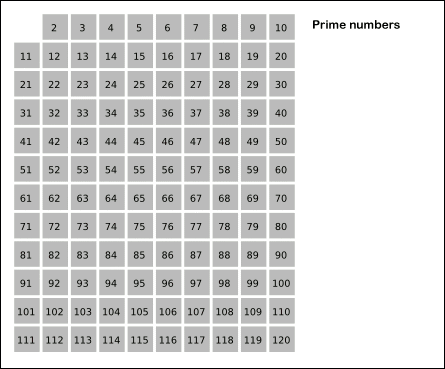

An implementation of the algorithm is shown below. The only remaining new function we need for this is the `floor` function, to find the largest integer such that $p^2\le n$. This can be found using `floor(Int, sqrt(n))`, which returns the largest integer less than or equal to $\sqrt{n}$.

In [10]:
function SieveOfEratosthenes(n)
    # Create a boolean array of length n, initialize all entries to as true
    # After the algorithm finishes, prime[i] will be true is i≥2 is a prime
    prime = trues(n)
    
    for p = 2:floor(Int, sqrt(n))
        if prime[p]
            for i = p^2:p:n
                prime[i] = false
            end
        end
    end
    
    # Return an array with all prime numbers
    primes = Int64[]
    for i = 2:n
        if prime[i]
            push!(primes, i)
        end
    end
    primes
end

SieveOfEratosthenes (generic function with 1 method)

In [11]:
println(SieveOfEratosthenes(100))            # All prime numbers up to 100

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [12]:
println(SieveOfEratosthenes(1000000)[end])   # The largest prime number less than 1,000,000

999983


### The dot-syntax: Vectorized operators and functions

Julia provides a convenient dot-syntax to perform *element-by-element operations* on an array.

- For every binary operator, e.g. `*`, there is a corresponding *dot operator* `.*` which is automatically defined to perform the `*` operation element-by-element.

- Any function `f` can be applied elementwise to an array by using the automatically defined function `f.`

These dot-operators are illustrated in the examples below.

In [13]:
x = [1, 3, 5]
y = [0.2, 4.0 , 3.1]
z = x .* y   # Element-by-element multiplication

3-element Array{Float64,1}:
  0.2
 12.0
 15.5

In [14]:
sqrt.(x)     # Element-by-element square roots

3-element Array{Float64,1}:
 1.0               
 1.7320508075688772
 2.23606797749979  

In [15]:
w = x .+ sqrt.(y .^ x)      # More complex mathematical expression, element-by-element

3-element Array{Float64,1}:
  1.4472135954999579
 11.0               
 21.920151004054308 

For elementwise complex expressions such as in the last example, Julia provides a `@.` syntax that makes all operators in the expression be applied elementwise:

In [16]:
@. x + sqrt(y^x)       # Same as before

3-element Array{Float64,1}:
  1.4472135954999579
 11.0               
 21.920151004054308 

When using the dot-operator on binary operations, the two arrays much have the same number of elements:

In [17]:
push!(y, 7)
x .* y      # Error: arrays must have same number of elements

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size")

However, if one of the arguments to the operator is a scalar, it is interpreted as a constant vector of the correct size:

In [18]:
x .* -3

3-element Array{Int64,1}:
  -3
  -9
 -15

The dot-syntax also works as expected for numerical literal coefficients:

In [19]:
-3x

3-element Array{Int64,1}:
  -3
  -9
 -15

Note that the dot-syntax is automatically defined even for new functions:

In [20]:
function pick_largest(x, y)
    if x > y
        return x
    else
        return y
    end
end

pick_largest (generic function with 1 method)

In [21]:
println("z = ", z)
println("w = ", w)
println("elementwise largest = ", pick_largest.(z,w))

z = [0.2, 12.0, 15.5]
w = [1.44721, 11.0, 21.9202]
elementwise largest = [1.44721, 12.0, 21.9202]


### Array slices

An array can be *sliced*, which means extracting a subset of the original array. This subset can be expressed as a range of indices, similar to the for-loop syntax, or more generally it can be any vector of integer indices.

In [22]:
println(y)               # Original vector
println(y[1:3])          # First 3 elements
println(y[1:2:4])        # All odd-numbered elements
println(y[end:-1:2])     # From end back to second element in reverse
println(y[4:3])          # Empty subset
println(y[:])            # All elements (same as original vector)
println(y[[4,2,4,3,3]])  # Index by vector - pick elements 4,2,4,3,3

[0.2, 4.0, 3.1, 7.0]
[0.2, 4.0, 3.1]
[0.2, 3.1]
[7.0, 3.1, 4.0]
Float64[]
[0.2, 4.0, 3.1, 7.0]
[7.0, 4.0, 7.0, 3.1, 3.1]


These so-called *ranges* can also be used to define the array itself. For example:
```julia
    x = 1:8
```
will define an object that can be used as an array. If needed, the matrix can be explicitly created using the `collect` function:

In [23]:
x1 = collect(1:3)

3-element Array{Int64,1}:
 1
 2
 3

In [24]:
x2 = collect(10:-2.5:-3)

6-element Array{Float64,1}:
 10.0
  7.5
  5.0
  2.5
  0.0
 -2.5

### Arrays are passed by sharing

When assigning arrays to new variables or passing them to functions, they still refer to the same array. This behavior is natural for performance reasons (or Julia would have to make a copy), but can be confusing for people used to e.g. MATLAB.

In [25]:
x = [1, -2, 3]
y = x
y[2] = 123
println("y = ", y)
println("x = ", x)

y = [1, 123, 3]
x = [1, 123, 3]


Note how the original array `x` also changed when an entry of `y` was modified. This is because the statement `y = x` only created a *shared reference* to the same array. If you really want a new copy which is independent of the original array, use the `copy` function:

In [26]:
z = copy(x)
z[3] = -53
println("z = ", z)
println("x = ", x)

z = [1, 123, -53]
x = [1, 123, 3]


The situation is the same when passing arrays to functions. For example:

In [27]:
function modify_scalar(x)
    x = 111
    return nothing
end

function modify_vector!(x)
    x[:] .= 111
    return nothing
end

x = 0
modify_scalar(x)
println("x = ", x)    # Still 0 - function does not modify a scalar

x = zeros(1,5)
modify_vector!(x)
println("x = ", x)    # Function modifies the original vector

x = 0
x = [111.0 111.0 111.0 111.0 111.0]


Because of this behavior, Julia recommends using an exclamation mark at the end of functions that might modify any of its arguments as an alert (but it is not enforced).

## Multi-dimensional arrays

Arrays can have multiple dimensions, e.g. 2-d arrays can be used to represent *matrices*. They can be constructed by using spaces between the number in each row, and semi-colons between the rows:

In [28]:
A = [1 2 3; -4 -5 -6]

2×3 Array{Int64,2}:
  1   2   3
 -4  -5  -6

Note the type `Array{Int64,2}`, indicating that this is a 2-d array (of integers). When accessing elements in a mutli-dimensional array, you supply multiple indices separated by commas inside the square brackets:

In [29]:
A[2,3]

-6

Multi-dimensional arrays can be operated on using similar syntax as for 1-d arrays. The `length` function returns the *total* number of elements in array:

In [30]:
length(A)

6

and the `size` function can be used to obtain the size of an array along a given dimension:

In [31]:
size(A,1)

2

In [32]:
size(A,2)

3

This can be used to traverse all the elements in a array like before, e.g. using multi-indices:

In [33]:
sumA = 0
for i = 1:size(A,1)
    for j = 1:size(A,2)
        sumA += A[i,j]
    end
end

println("Sum of the elements in A = ", sumA)

Sum of the elements in A = -9


This is also an example of a *nested for-loop*. For each value of `i`, the *inner* loop with go through all values of `j`. For example, if the size of `A` is 2-by-3, the nested loops will produce the values (i,j) = (1,1), (1,2), (1,3), (2,1), (2,2), (2,3).

Nested for-loops can also be written using the following shorter syntax, which puts both of the loop variables and indices on the same line:

In [34]:
sumA = 0
for i = 1:size(A,1), j = 1:size(A,2)
    sumA += A[i,j]
end

println("Sum of the elements in A = ", sumA)

Sum of the elements in A = -9


The `in` syntax can be used for multi-dimensional arrays as well, if indices are not needed:

In [35]:
sumAsquared = 0
for a in A
    sumAsquared += a^2
end

print("Sum of the squares of the elements in A = ", sumAsquared)

Sum of the squares of the elements in A = 91

### Multi-dimensional array creation

The built-in functions from before extend to arrays of any dimension:

| Function                             | Description                                                    |
|:------------------------------------ |:-------------------------------------------------------------- |
| `zeros(T, dims...)`                  | an array of size dims of all zeros                             |
| `ones(T, dims...)`                   | an array of size dims of all ones                              |
| `trues(n, dims...)`                  | a `BitArray` of size dims with all values `true`               |
| `falses(n, dims...)`                 | a `BitArray` of size dims with all values `false`              |

Here, `dims...` means a comma-separated list of the size of the array along each dimension. For example:

In [36]:
C = ones(5,3)               # 5-by-4 matrix with all elements == 1

5×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

Note that Julia distinguishes between 1-d arrays, 2-d column vectors, and 2-d row vectors (unlike MATLAB which does not have pure 1-d arrays):

In [37]:
ones(5)      # 1-d array (can be used as a column vector)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [38]:
ones(5,1)    # 2-d array, column vector

5×1 Array{Float64,2}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [39]:
ones(1,5)    # 2-d array, row vector

1×5 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0

New arrays can also be created by concatenation using the square bracket syntax:

In [40]:
D = [A; C]                     # Vertical concatenation - arrays must have same # columns
E = [zeros(5) C]               # Horizontal concatenation - arrays must have same # rows
F = [A ones(2,2); zeros(1,5)]  # General vertical-horizontal concatenation - all dimensions must match

3×5 Array{Float64,2}:
  1.0   2.0   3.0  1.0  1.0
 -4.0  -5.0  -6.0  1.0  1.0
  0.0   0.0   0.0  0.0  0.0

Note that when combining arrays that include ranges, they will often automatically be converted:

In [41]:
G = [1:5 ones(Int64,5) 101:105]

5×3 Array{Int64,2}:
 1  1  101
 2  1  102
 3  1  103
 4  1  104
 5  1  105

### Dot-syntax and slices for multi-dimensional arrays

The dot-syntax works on multi-dimensional arrays just like before. For example:

In [42]:
B = A.^2 .- 3A           # Apply function elementwise

2×3 Array{Int64,2}:
 -2  -2   0
 28  40  54

In [43]:
B = @. A^2 - 3A          # Easier syntax - entire expression evaluated elementwise

2×3 Array{Int64,2}:
 -2  -2   0
 28  40  54

Similarly, slices work as before, except you can now provide a subset of indices for each array dimension:

In [44]:
A[1,:]             # Row 1

3-element Array{Int64,1}:
 1
 2
 3

In [45]:
A[:,1]             # Column 1

2-element Array{Int64,1}:
  1
 -4

In [46]:
A[:,2:3]           # Columns 2-3

2×2 Array{Int64,2}:
  2   3
 -5  -6

This can also be used to *modify* parts of the array:

In [47]:
A[:,[1,3]] .= 0          # Set columns 1 and 3 to zero
A

2×3 Array{Int64,2}:
 0   2  0
 0  -5  0

In [48]:
A[:,2:3] = 2A[:,1:2]     # Set columns 2 and 3 to twice of columns 1 and 2
A

2×3 Array{Int64,2}:
 0  0    4
 0  0  -10

## Plotting

Plotting data is a very important tool in most areas of scientific and mathematical computing. Julia provides a number of packages and options for this, and here we will focus on the popular `PyPlot` package. It is designed to mimic many of MATLAB's plotting functions.

### Including the PyPlot package

First of all, when you use a so-called *package* in Julia, you need to tell it e.g. with the `using` command:

In [49]:
using PyPlot

### Basic plotting

The basic plotting function is `plot(x,y)`, which draws straight lines between the x,y-coordinates in the vectors `x` and `y`.

The example below illustrates some basic usage by drawing two geometric objects. Some more comments about this code:

- Since these x,y-coordinates represent a 2D plane, it is natural to have them equally scaled (so that e.g. the square will look like a square and not a rectangle). This is done using the command `axis("equal")`.
- The `grid(true)` command includes grid-lines in the plot.
- `xlabel`, `ylabel`, and `title` include strings of text in the plot, enclosed by `""`.

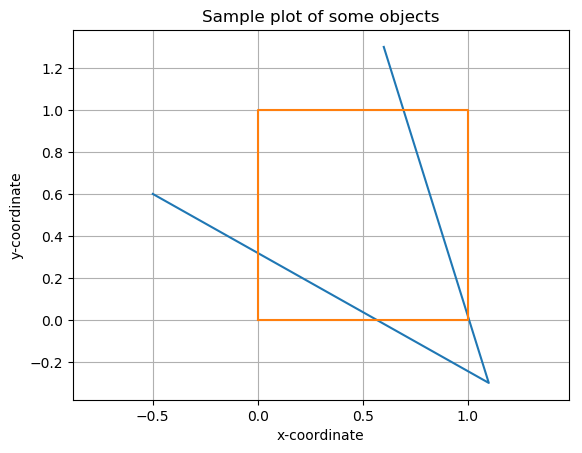

In [50]:
x_lines = [-.5, 1.1, 0.6]
y_lines = [.6, -.3, 1.3]
plot(x_lines, y_lines)

x_square = [0,1,1,0,0]
y_square = [0,0,1,1,0]
plot(x_square, y_square)

axis("equal")
grid(true)
xlabel("x-coordinate")
ylabel("y-coordinate")
title("Sample plot of some objects");

### Plotting functions

We can use arrays to evaluate and plot functions of the form $y=f(x)$. While there are good packages to do this automatically, the most common approach is to manually create an array of $x$-values, evaluate the corresponding $y$-values, and plot by drawing straight lines between the points. Clearly this method has potential issues (e.g. it is unclear how many points are needed, and discontinuous functions will not be drawn correctly).

As an example, consider the function $f(x) = \sin 5\pi x + 0.2\sin 25\pi x - 0.3x$. On the interval $x\in [0,10]$, the code below shows how to plot $f(x)$, $f(x-3)$, and $-0.7f(x^2)$. It also illustrates several new features:

- The parameters `linewidth`, `linestyle`, and `color` can be used to control the appearance of the lines
- The `legend` function creates a box with indentifying text for each line

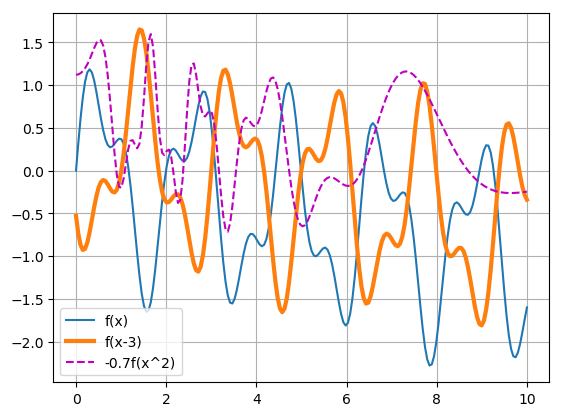

In [51]:
f(x) = sin(3x) + 0.5sin(7x) - 0.1x
x = range(0, stop=10, length=200)      # Create x-vector, 200 points should make a good plot

plot(x, f.(x))
plot(x, f.(x .- 3), linewidth=3)
plot(x, (@. -0.7f(100/(10 + x^2))), color="m", linestyle="--")
legend(("f(x)", "f(x-3)", "-0.7f(x^2)"))
grid(true);

### Plotting parametric curves

The technique from above can easily be extended for plotting parametric curves. For example, consider

$$
\left\{
\begin{array}{l}
x = r\cos(10\pi s) \\
y = r\sin(10\pi s)
\end{array}
\right.
$$

with $r = 0.1+s+0.1\sin(50\pi s)$, for $s\in [0,1]$.

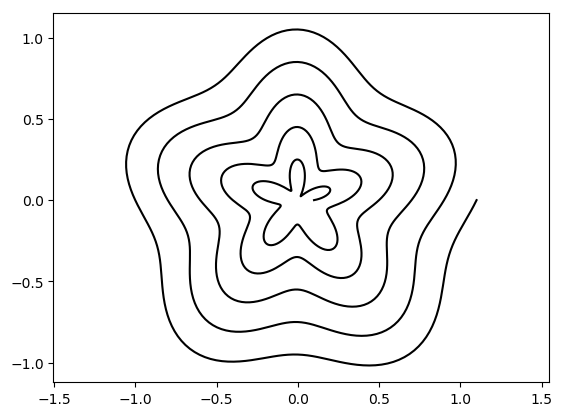

In [52]:
s = 0:0.001:1
r = @. .1 + s + 0.1sin(50π*s)
x = @. r*cos(10π*s)
y = @. r*sin(10π*s)
plot(x, y, "k")
axis("equal");